In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scsavailability as scs
    
import statsmodels.api as sm
from scipy import stats

from scsavailability import features as feat, model as md, results as rs

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

path = 'C:/Users/Jamie.williams/OneDrive - Newton Europe Ltd/Castle Donnington/Data/'

at = pd.read_csv(path+'active_totes_20201210.csv')
av = pd.read_csv(path+'Availability_with_Grey&Blue_1811-0912.csv',names = ["timestamp","Pick Station","Availability","Blue Tote Loss","Grey Tote Loss"])
#fa = pd.read_csv(path + 'scs_tote_matched.csv')
scs_raw = pd.read_csv(path + 'Faults20_11-10_12.csv')

fa_max = pd.to_datetime(scs_raw['Entry Time'],dayfirst=True).max()
report_start = fa_max - pd.to_timedelta(12, unit='H')
report_end = fa_max.ceil('H')

at = feat.pre_process_AT(at)
av = feat.pre_process_av(av)
fa,unmapped, end_time = feat.preprocess_faults(scs_raw)

Output,R2,Num_Assets = rs.run_single_model(at,av,fa,report_start,report_end,shift=0,weights=[1],speed=470,picker_present=0.91,availability=0.71)

Running: Function "pre_process_AT" (id=1773427754176) was called 2 times
Running: Function "pre_process_av" (id=1773427756768) was called 2 times
Running: Function "preprocess_faults" (id=1773427755328) was called 2 times
Running: Function "load_tote_lookup" (id=1773427756192) was called 2 times
Running: Function "load_module_lookup" (id=1773424770208) was called 2 times
Running: Function "load_ID_lookup" (id=1773427756912) was called 2 times
Running: Function "run_single_model" (id=1773429490736) was called 2 times
Running: Function "floor_shift_time_fa" (id=1773427755472) was called 1 times


TypeError: floor_shift_time_fa() got an unexpected keyword argument 'duration_thres'

In [ ]:
path = 'C:/Users/Jamie.williams/OneDrive - Newton Europe Ltd/Castle Donnington/Data/'

In [45]:
at = pd.read_csv(path+'active_totes_20201210.csv')
av = pd.read_csv(path+'Availability_with_Grey&Blue_1811-0912.csv',names = ["timestamp","Pick Station","Availability","Blue Tote Loss","Grey Tote Loss"])
#fa = pd.read_csv(path + 'scs_tote_matched.csv')
scs_raw = pd.read_csv(path + 'Faults20_11-10_12.csv')

FileNotFoundError: [Errno 2] File C:/Users/Jamie.williams/OneDrive - Newton Europe Ltd/Castle Donnington/Data/active_totes_20201210.csv does not exist: 'C:/Users/Jamie.williams/OneDrive - Newton Europe Ltd/Castle Donnington/Data/active_totes_20201210.csv'

In [5]:
at = feat.pre_process_AT(at)

Running: Function "pre_process_AT" (id=1271769208000) was called 2 times


In [6]:
av = feat.pre_process_av(av)

Running: Function "pre_process_av" (id=1271769210592) was called 1 times


In [7]:
fa,unmapped, end_time = feat.preprocess_faults(scs_raw)

#fa= fa[fa['timestamp']<(fa['timestamp'].max()-pd.to_timedelta(7, unit='D'))]

Running: Function "preprocess_faults" (id=1271769209152) was called 1 times
Running: Function "load_tote_lookup" (id=1271769210016) was called 1 times
Running: Function "load_module_lookup" (id=1271766285328) was called 1 times
Running: Function "load_ID_lookup" (id=1271769210736) was called 1 times


In [8]:
fa_floor = feat.floor_shift_time_fa(fa, shift=0)

Running: Function "floor_shift_time_fa" (id=1271769209296) was called 1 times


In [10]:
df,fa_PTT = feat.create_PTT_df(fa_floor,at,av,weights = [1])

df = feat.log_totes(df) 

Running: Function "create_PTT_df" (id=1271769425952) was called 2 times
Running: Function "fault_select" (id=1271769423936) was called 1 times
Running: Function "load_PTT_lookup" (id=1271769210448) was called 1 times
Running: Function "faults_aggregate" (id=1271769424224) was called 1 times
Running: Function "weight_hours" (id=1271769425376) was called 1 times
Running: Function "av_at_select" (id=1271769424512) was called 1 times
Running: Function "aggregate_availability" (id=1271769424800) was called 1 times
Running: Function "aggregate_totes" (id=1271769425088) was called 1 times
Running: Function "merge_av_fa_at" (id=1271769425664) was called 1 times
Running: Function "fault_select" (id=1271769423936) was called 2 times
Running: Function "load_PTT_lookup" (id=1271769210448) was called 2 times
Running: Function "faults_aggregate" (id=1271769424224) was called 2 times
Running: Function "weight_hours" (id=1271769425376) was called 2 times
Running: Function "av_at_select" (id=1271769424

Running: Function "fault_select" (id=1271769423936) was called 15 times
Running: Function "load_PTT_lookup" (id=1271769210448) was called 15 times
Running: Function "faults_aggregate" (id=1271769424224) was called 15 times
Running: Function "weight_hours" (id=1271769425376) was called 15 times
Running: Function "av_at_select" (id=1271769424512) was called 15 times
Running: Function "aggregate_availability" (id=1271769424800) was called 15 times
Running: Function "aggregate_totes" (id=1271769425088) was called 15 times
Running: Function "merge_av_fa_at" (id=1271769425664) was called 15 times
Running: Function "fault_select" (id=1271769423936) was called 16 times
Running: Function "load_PTT_lookup" (id=1271769210448) was called 16 times
Running: Function "faults_aggregate" (id=1271769424224) was called 16 times
Running: Function "weight_hours" (id=1271769425376) was called 16 times
Running: Function "av_at_select" (id=1271769424512) was called 16 times
Running: Function "aggregate_availa

Running: Function "fault_select" (id=1271769423936) was called 29 times
Running: Function "load_PTT_lookup" (id=1271769210448) was called 29 times
Running: Function "faults_aggregate" (id=1271769424224) was called 29 times
Running: Function "weight_hours" (id=1271769425376) was called 29 times
Running: Function "av_at_select" (id=1271769424512) was called 29 times
Running: Function "aggregate_availability" (id=1271769424800) was called 29 times
Running: Function "aggregate_totes" (id=1271769425088) was called 29 times
Running: Function "merge_av_fa_at" (id=1271769425664) was called 29 times
Running: Function "fault_select" (id=1271769423936) was called 30 times
Running: Function "load_PTT_lookup" (id=1271769210448) was called 30 times
Running: Function "faults_aggregate" (id=1271769424224) was called 30 times
Running: Function "weight_hours" (id=1271769425376) was called 30 times
Running: Function "av_at_select" (id=1271769424512) was called 30 times
Running: Function "aggregate_availa

In [11]:
df

,timestamp,Availability,C05,C0501ACH011,C0501RDC004,C0501STA002,C0501STA012,C0501STA020,C0501STA201,C0501STA217,...,SCS202,SCS203,SCS204,SCS205,SCS206,SCSM20,C1404RDC146,C1404STA149,C14PTT202,log_totes
0,2020-11-20 00:00:00,0.816168,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,3.591024
1,2020-11-20 01:00:00,0.806332,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,3.482777
2,2020-11-20 02:00:00,0.314598,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,3.162658
3,2020-11-20 03:00:00,0.967823,0.0,0.0,0.0,0.0,2.94591,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,3.512540
4,2020-11-20 04:00:00,0.495364,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,3.494485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,2020-12-09 13:00:00,0.989251,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,6.834811,6.123964,0.000000,21.264287,0.0,7.529429,0.0,0.000000,0.000000,3.936716
462,2020-12-09 14:00:00,0.884003,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,6.720312,6.662960,26.009172,0.0,16.736374,0.0,0.000000,0.000000,4.332048
463,2020-12-09 15:00:00,0.929763,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,7.356108,0.000000,6.337538,14.578136,0.0,0.000000,0.0,7.111467,13.330787,4.177204
464,2020-12-09 16:00:00,0.976545,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,7.302619,11.024011,0.0,0.000000,0.0,0.000000,2.609438,4.054390


In [ ]:
df_week = df[df['timestamp']>end_time - pd.to_timedelta(14, unit='D')]

In [ ]:
X,y = md.gen_feat_var(df,target = 'Availability', features = ['Faults','Totes'])


In [ ]:
X_train, X_test, y_train, y_test = md.split(X,y,split_options = {'test_size': 0.3,
                                                                 'random_state': 42})

R2_cv,R2_OOS,Coeff = md.run_OLS(X_train = X_train,y_train = y_train,X_test = X_test,y_test=y_test, n = 30)

In [ ]:
R2_OOS

# Plotting

In [34]:
Output[Output['AREA'] == 'PTT']['ID'].value_counts()

C13PTT172    54
C08PTT082    39
C08PTT072    38
C12PTT142    31
C06PTT031    28
C10PTT111    25
C05PTT011    24
C12PTT152    20
C06PTT032    20
C14PTT192    16
C07PTT042    15
C10PTT112    13
C06PTT022    12
C11PTT131    11
C11PTT132    11
C11PTT122    10
C11PTT121     6
Name: ID, dtype: int64

In [49]:
Total = Output[['AREA','SINGLES']].groupby('AREA').sum().reset_index()

Text(0.5, 1.0, 'SCS Lost Singles Last 12 Hours')

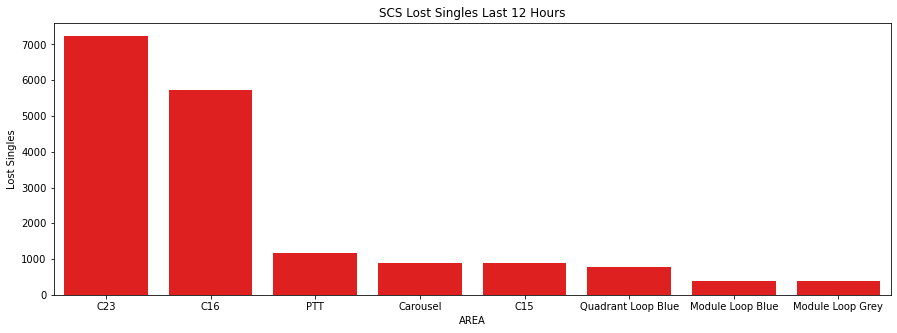

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(y='SINGLES',x = 'AREA',data = Total.sort_values(by='SINGLES',ascending=False).head(10),color = 'r')
plt.ylabel('Lost Singles')
plt.title('SCS Lost Singles Last 12 Hours')

In [37]:
PTT081 = Output[['Asset Code','PTT081']].groupby('Asset Code').sum().reset_index()

KeyError: "None of [Index(['Asset Code', 'PTT081'], dtype='object')] are in the [columns]"

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(y='PTT081',x = 'Asset Code',data = PTT081.sort_values(by='PTT081',ascending=False).head(5),color = 'r')
plt.ylabel('Lost Singles')
plt.title('PTT081 Lost Singles Last 12 Hours')

In [38]:
Total_colour = Output[['BLUEGREY','SINGLES']].groupby('BLUEGREY').sum().reset_index()

Text(0.5, 1.0, 'SCS Lost Singles Last 12 Hours')

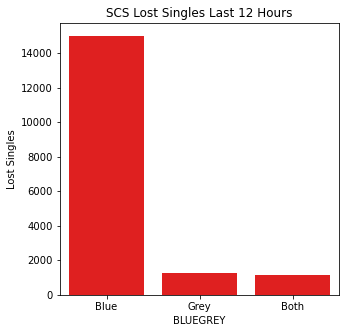

In [39]:
plt.figure(figsize=(5,5))
sns.barplot(y='SINGLES',x = 'BLUEGREY',data = Total_colour.sort_values(by='SINGLES',ascending=False),color = 'r')
plt.ylabel('Lost Singles')
plt.title('SCS Lost Singles Last 12 Hours')

In [40]:
Total_colour

,BLUEGREY,SINGLES
0,Blue,14997.588148
1,Both,1156.783132
2,Grey,1280.695829


In [ ]:
sns.lmplot(x='log_totes', y='Availability', data=df, line_kws={"color": "red"})
plt.xlim(0, 5)

In [ ]:
sns.lmplot(x='TOTES', y='Availability', data=df_week, line_kws={"color": "red"})

In [ ]:
ax = sns.regplot(x="TOTES", y="Availability", data=df_week,
x_estimator=np.mean, logx=True, line_kws={"color": "red"})
plt.ylim(0,1)

In [ ]:
sns.lmplot(x='log_totes', y='Availability', data=df_week, line_kws={"color": "red"})
plt.xlim(0, 5)

In [ ]:
Shift = [0,0,0,10,10,10,20,20,20]
Weights = [[1],[0.7,0.3],[0.7,0.2,0.1],[1],[0.7,0.3],[0.7,0.2,0.1],[1],[0.7,0.3],[0.7,0.2,0.1]]

In [ ]:
Weights[8]

In [ ]:
y

In [ ]:
at

In [ ]:
fa_floor

In [ ]:
df.drop(['Availability','Blue Tote Loss','Grey Tote Loss','timestamp'],axis=1)

In [ ]:
Outputs = {0.5:'Number One',0.4:'Number Two',-1.4:'Number 3'}

In [ ]:
 Output = Outputs[max(k for k, v in Outputs.items())]

In [ ]:
Outputs[0.456]='Numbers 4'

In [ ]:
Outputs

In [ ]:
print('Selected R2:', max(k for k, v in Outputs.items()))

In [ ]:
fa_floor = feat.floor_shift_time_fa(fa, shift=10)

df,fa_PTT = feat.create_PTT_df(fa_floor,at,av,weights=[0.7,0.2,0.1])
df = feat.log_totes(df) 
df_2week = df[df['timestamp']>end_time - pd.to_timedelta(14, unit='D')]
X,y = md.gen_feat_var(df_2week,target = 'Availability', features = ['Totes','Faults'])
X_train, X_test, y_train, y_test = md.split(X,y,split_options = {'test_size': 0.3,
                                                                    'random_state': None})

R2_cv,R2_OOS,Coeff = md.run_OLS(X_train = X_train,y_train = y_train,X_test = X_test,y_test=y_test, n = 30)

Output = rs.create_output(fa_PTT,Coeff,end_time,speed = speed, picker_present = picker_present, availability = availability)

In [ ]:
R2_OOS

In [ ]:
fa_floor

In [ ]:
print(fa.loc[fa['Area'].isnull() & fa['Desk'] == 'Z', 'Area'])

In [ ]:
fa['Area'].isnull() & fa['Desk'] == 'Z' 

In [ ]:
fa

In [ ]:
type(fa)

In [ ]:
from datetime import datetime 
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

In [ ]:
log = pd.read_excel('C:/Users/Jamie.williams/desktop/scs/Run_log.xlsx')
new_row = pd.DataFrame([['dt_string','R2_sel','feat_sel','runtime','report_start','report_end']],columns = list(log.columns))

In [ ]:
new_row

In [ ]:
import time
now = datetime.now()
time.sleep(2)
now2 = datetime.now()
now2-now

In [ ]:
'asdsad' +'asddasd'

In [ ]:
fa['timestamp'].max()

In [ ]:
max_date = pd.to_datetime(scs_raw['Entry Time'],dayfirst=True).max()

In [ ]:
max_date2 = pd.to_datetime(fa_old['Entry Time'],dayfirst=True).max()

In [16]:
Test_time = pd.to_timedelta(48,unit='H')

In [17]:
Test_time.days

2

In [49]:
av = pd.DataFrame({'timestamp':['2021-01-09 08:00:00','2021-01-10 08:00:00','2021-01-11 08:00:00','2021-01-12 08:00:00','2021-01-13 08:00:00'],'Pick Station':['PTT011','PTT051','PTT072','PTT112','PTT202'],'Availability':[0.9,0.8,0.75,0.3,0.1]})

In [50]:
av

,timestamp,Pick Station,Availability
0,2021-01-09 08:00:00,PTT011,0.90
1,2021-01-10 08:00:00,PTT051,0.80
2,2021-01-11 08:00:00,PTT072,0.75
3,2021-01-12 08:00:00,PTT112,0.30
4,2021-01-13 08:00:00,PTT202,0.10
